In [886]:
#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [887]:

df = pd.read_csv('amazon_data_cleaned_01.csv')
df.columns
df = df.replace('nan', np.nan, regex=True)
df = df.replace(0, np.nan, regex=True)
df.drop('Unnamed: 0', axis=1,inplace=True)

In [888]:
#Cleaning number of reviews
pd.set_option('display.max_colwidth', 30)
df['number_reviews'] = df['number_reviews'].str.replace('ratings','')
df['number_reviews'] = df['number_reviews'].str.replace('Nan','0')
df['number_reviews'] = df['number_reviews'].str.replace(',','')
df['number_reviews'] = df['number_reviews'].str.replace('rating','').astype('int')

In [889]:
#cleaning rating out of 5
df['rating'] = df['rating'].str.replace('out of 5','').astype('float')

In [890]:
#cleaning weight and its dimentions ['pounds', nan, 'ounces', 'grams', 'kilograms']
#divide weight into float and dimention
df['weight_float'] = df['weight'].apply(lambda x:  x if type(x)==float else x.split()[0]).astype(float)
df['weight_dimention'] = df['weight'].apply(lambda x:  x if type(x)==float else x.split()[1]).str.lower()

In [891]:
class dimention_convertion_weight():
    '''
     pounds' 'ounces', 'grams' to 'kilograms'
    '''
    def __init__(self,value_float, dimention) :
        self.value = value_float
        self.dimention = dimention
        
    def convert (self):
        if self.dimention ==  'pounds':
            self.from_pound_to_kg() 
            return self.value
        elif self.dimention ==  'ounces':
            self.from_ounces_kg()
            return self.value
        elif self.dimention == 'grams':
            self.from_grams_to_kg()
            return self.value
        elif self.dimention == 'kilograms':
            return self.value

    def from_pound_to_kg( self):
       
           self.value =  self.value / 2.20462
       
    def from_ounces_kg(self):
       
            self.value =  self.value / 35.247
        
    def from_grams_to_kg(self):
        
           self.value =  self.value / 1000

Apply convertion_dimention_weight class, 24 mats have less than 0.3kg

In [892]:
df['weight_kg'] = df.apply(lambda row: dimention_convertion_weight(row.weight_float ,row.weight_dimention).convert(), axis=1)

weight_less_than =df['weight_kg'] [df['weight_kg'] < 0.5]
b = weight_less_than > 0
print(b.sum())
weight_less_than.unique()


41


array([0.45359291, 0.11339823, 0.26      , 0.002     , 0.08164672,
       0.34045451, 0.15875752, 0.0905    , 0.10432637, 0.29937132,
       0.2494761 , 0.49      , 0.18015718, 0.18143716, 0.34019468,
       0.18      , 0.27215575, 0.06241666, 0.4       , 0.18157574,
       0.3       , 0.2       , 0.00907186, 0.40823362, 0.00453593,
       0.28087497])

In [893]:
#pd.set_option('display.max_colwidth', None)
df[df['weight_kg'] < 0.5][b][['mat_url','weight_kg','weight_float','weight_dimention']]
#delete 697 and all where L is below 30 inches and W below 10

,mat_url,weight_kg,weight_float,weight_dimention
28,https://www.amazon.com/Go-...,0.453593,1.00,pounds
29,https://www.amazon.com/Gai...,0.113398,0.25,pounds
56,https://www.amazon.com/Foi...,0.453593,1.00,pounds
70,https://www.amazon.com/Gai...,0.453593,1.00,pounds
155,https://www.amazon.com/Exe...,0.260000,260.00,grams
158,https://www.amazon.com/man...,0.002000,2.00,grams
206,https://www.amazon.com/Wow...,0.081647,0.18,pounds
207,https://www.amazon.com/Des...,0.340455,12.00,ounces
211,https://www.amazon.com/Pro...,0.158758,0.35,pounds
231,https://www.amazon.com/Man...,0.453593,1.00,pounds


In [894]:
df.drop(['weight_float','weight_dimention','weight','mat_url','table_features_color_care_material'], axis=1, inplace=True)

In [895]:
df.shape

(1086, 14)

In [896]:
df.head(5)

,name,number_reviews,rating,reviews_text,other_prices,other_colors,combined_price,dimentions,care,thickness,material,brand,color,weight_kg
0,"YuniMuse Yoga Mat, Exercis...",58,4.5,Jade|Perfect thickness and...,0,"""Black"" -""Green-black"" -""P...",NaN,72 x 24 inches,Water proof,6 MicronItem,Thermoplastic ElastomersP...,YuniMuse,Color BlackBrand YuniMuse,0.816467
1,"Matymats Yoga Mat, Workout...",191,4.6,"Amanda|Beautiful, high qua...",0,"""72&quot; x 24&quot; Chris...",15.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jpodream Yoga Mat, Exercis...",34,4.7,A.S|Nice & Comfy mat|Revie...,0,0,19.99,NaN,NaN,6 Millimeters,Thermoplastic Elastomer,Jpodream,Brand Jpodream,NaN
3,SPWOLFRT 2 Pack Wall Mount...,101,4.2,Tee|Didn’t work out|Review...,0,0,10.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yoga Direct Deluxe Extra T...,307,4.6,shar|color???|Reviewed in ...,0,"""Forest Green"" -""Gray"" -""J...",NaN,72 x 0.25 x 24 inchesItem,Hand Wash Only,NaN,FoamProduct,Yoga Direct,Color GrayBrand Yoga Direct,1.360779


Converting dimentions and thickness in three rows: L X W X thickness_two

In [897]:
#L
df['dimentions'] = df['dimentions'].str.strip().str.lower()
df['L'] = df['dimentions'].apply(lambda x:  x if type(x)==float else x.split('x',1)[0]).astype(float)


In [898]:
#W
df['W'] = df['dimentions'].apply(lambda x:  x if type(x)==float else x.split('x',1)[1]).str.strip()
df['W'] = df['W'].apply(lambda x:  x if type(x)==float else x.split(' ',1)[0]).astype(float)


In [899]:
#thickness
#filter from W forward
df['thickness_2'] = df['dimentions'].apply(lambda x:  x if type(x)==float else x.split('x',1)[1]).str.strip()
#filter from thickness forward
df['thickness_2'] = df['thickness_2'].apply(lambda x:  x if type(x)==float else x.split(' ',1)[1]).str.strip()
#filter only thickness
regex_thickness = re.compile(r'[\d+\.]+[\d*]')
df['thickness_2']= df['thickness_2'].apply(lambda x:  x if type(x)==float else re.findall(regex_thickness,x))
df['thickness_2'] = df['thickness_2'].apply(lambda y: np.nan  if y==[] else float(str(y).replace("['",'').replace("']",'')))
df['thickness_2'][df['thickness_2'].notnull()]
#dimention
#filter only text
regex_dimention = re.compile(r'[a-z]+')
df['dimention_LXW']= df['dimentions'].apply(lambda x:  x if type(x)==float else re.findall(regex_dimention,x))
df['dimention_LXW'] = df['dimention_LXW'].apply(lambda y: np.nan  if y==[]  else str(y))
df['dimention_LXW'].unique()
#all is in inches / but is mm for the thickness

array(["['x', 'inches']", 'nan', "['x', 'x', 'inchesitem']",
       "['x', 'x', 'inches']", "['x', 'inchesitem']"], dtype=object)

In [900]:
#df.isna().sum()

In [901]:
#put max value as L and min value as thickness
df = df.replace(np.nan, 0, regex=True)
df['L'] = df[['W','L','thickness_2']].max(axis=1)
df['thickness_2'] = df[['W','L','thickness_2']].min(axis=1)
df['A'] = df[['W','thickness_2']].max(axis=1)
df['B'] = df[['W','L']].min(axis=1)
df['W'] = df[['A','B']].max(axis=1)


Half of  dimensions are nan and 1/5 of exixsting ones are not valid

In [902]:
df = df.replace(0,np.nan, regex=True)
L_less_than_20 = df[df['L'] < 20][['mat_url','weight_kg','L','W','thickness_2']]
W_less_than_20 = df[df['W'] < 10][['mat_url','weight_kg','L','W','thickness_2']]
W_less_than_20.shape 

KeyError: "['mat_url'] not in index"

In [ ]:
df['thickness']=df['thickness'].str.strip()
df['thickness_float'] = df['thickness'].apply(lambda x:  x if type(x)==float else x.split()[0]).astype(float)
df['thickness_dim']= df['thickness'].apply(lambda x:  x if type(x)==float else x.split()[1]).str.lower().str.replace('item','').str.replace('league','')
print(df['thickness_dim'].unique())

['micron' nan 'millimeters' 'inches' 'centimeters' 'mils' 'feet']


In [ ]:
class dimention_convertion_thickness():
    '''
     'feet', 'micron' 'centimeters', 'inches' to 'milimeters'
    '''
    def __init__(self,value_float, dimention) :
        self.value = value_float
        self.dimention = dimention
        
    def convert (self):
        if self.dimention == 'feet':
            self.from_feet_to_mm() 
            return self.value
        elif self.dimention ==  'micron':
             self.from_micron_to_mm()
             return self.value
        elif self.dimention == 'centimeters':
            self.from_cm_to_mm()
            return self.value
        elif self.dimention == 'inches':
            self.from_inches_to_mm()
            return self.value
        elif self.dimention == 'millimeters':
            return self.value
        elif self.dimention == 'mils':
            return self.value  
        elif self.value == 'nan':
            return np.nan   
        else:
            return(np.nan)  

    def from_feet_to_mm( self):
       
           self.value =  self.value * 304.8
       
    def from_micron_to_mm(self):
       
             self.value =  self.value / 1000
        
    def from_cm_to_mm(self):
        
           self.value =  self.value * 10

    def from_inches_to_mm(self):
        
           self.value =  self.value * 25.4


          
#thickness from second source is in differnt dimentions will convert all to mm in column thickness_mm
#apply convertion_dimention class
df['thickness_mm'] = df.apply(lambda row: dimention_convertion_thickness(row.thickness_float ,row.thickness_dim).convert(), axis=1)
df['thickness_mm'].unique()

array([6.0000e-03,        nan, 6.0000e+00, 1.0000e+01, 6.3500e+00,
       4.5000e+00, 7.6200e+00, 8.0000e+00, 5.0000e+00, 2.0000e+00,
       7.0000e+00, 3.3020e+00, 6.0960e+00, 1.5240e+02, 1.2700e+01,
       5.0800e+00, 3.5560e+00, 4.7000e+00, 4.0000e+00, 1.5000e+00,
       1.5000e+01, 7.8740e+00, 1.5748e+01, 2.5400e+01, 3.0000e+00,
       1.5240e+00, 1.0000e+00, 9.6520e+00, 4.0640e+00, 5.5000e+00,
       6.0000e+01, 5.5880e+00, 4.3180e+00, 7.3152e+01, 1.3000e+00,
       2.0320e+00, 5.0800e+01, 9.9060e+00, 2.8956e+01, 4.3000e+00])

In [ ]:
df.drop(['thickness','thickness_float','thickness_dim'], axis=1, inplace=True)

(4, 30)

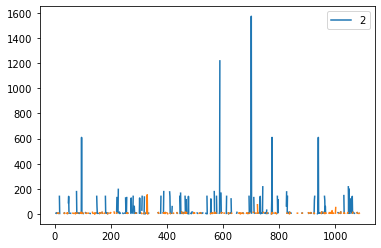

In [ ]:
#thickness_2 from inches to mm
df['thickness_2'] =df['thickness_2'].apply(lambda x: dimention_convertion_thickness(x ,'inches').convert())
#%%
#comparing  thickness_2 from table features and thickness_mm
plt.plot(df['thickness_2'], label ='2')
plt.plot(df['thickness_mm'])
plt.legend()
mask_1 = df['thickness_2'] > 0
mask_2 = df['thickness_mm'] > 0
mask_3 = df['thickness_2'] > 15 
mask_4 = df['thickness_mm'] > 15
len(df['thickness_mm'][mask_1][mask_2][mask_4]), len(df['thickness_2'][mask_1][mask_2][mask_3])
# about 3 mats has a width higher than 20mm (14, 29)

In [ ]:
mask_1 = df['thickness_2'] > 0
mask_2 = df['thickness_mm'] > 0
mask_3 = df['thickness_2'] < 3 
mask_4 = df['thickness_mm'] < 3
len(df['thickness_mm'][mask_1][mask_2][mask_4]), len(df['thickness_2'][mask_1][mask_2][mask_3])

(16, 11)

Comparing thickness from the two sources and 262 out of 265 have less thann 2mm difference: 

In [ ]:

#%%
thickness_1 = df['thickness_mm'][mask_1][mask_2]
thickness_2 = df['thickness_2'][mask_1][mask_2]
mask_for_difference_less_than_2mm = (thickness_1-thickness_2) < 2
mask_for_difference_more_than_2mm = (thickness_1-thickness_2) > 2
#%%
mask_for_difference_less_than_2mm.sum(), len(thickness_2), len(thickness_1)

#%%

(262, 265, 265)

Combining thickness from different sources in one column 

In [ ]:
df = df.replace(np.nan,0, regex=True)
df['final_thickness'] = df['thickness_mm']
print(df['final_thickness'].isna().sum())
#df['final_thickness'] = df['final_thickness'].apply(lambda x:400 if x==0 else x )
df['final_thickness'] = df.apply(lambda row: row.thickness_2 if row.thickness_mm==0 else row.thickness_mm, axis=1)
df = df.replace(0,np.nan ,regex=True)
print(df['final_thickness'].isnull().sum())

#df['final_thickness'].unique()

0
490


array([6.00000e-03,         nan, 6.00000e+00, 6.35000e+00, 1.00000e+01,
       5.08000e+00, 4.50000e+00, 1.39954e+02, 3.55600e+00, 7.62000e+00,
       6.09600e+00, 1.27000e+01, 1.09982e+02, 2.23520e+01, 8.00000e+00,
       5.00000e+00, 2.00000e+00, 7.00000e+00, 3.30200e+00, 2.00660e+01,
       1.52400e+02, 2.03200e+00, 1.77800e+02, 2.54000e+00, 4.06400e+00,
       3.04800e+00, 7.87400e+00, 1.01600e+01, 4.70000e+00, 2.99720e+01,
       5.84200e+01, 9.90600e+00, 3.81000e+00, 4.00000e+00, 1.50000e+00,
       1.50000e+01, 1.49860e+01, 5.84200e+00, 1.27000e+02, 1.98120e+01,
       5.99440e+01, 4.82600e+00, 1.57480e+01, 2.54000e+01, 3.00000e+00,
       1.52400e+00, 1.00000e+00, 1.75260e+02, 9.65200e+00, 1.65100e+02,
       5.50000e+00, 1.19380e+01, 6.00000e+01, 1.01600e+02, 5.58800e+00,
       7.11200e+00, 1.29540e+01, 4.31800e+00, 3.50520e+01, 1.19634e+02,
       1.57480e+03, 1.30048e+02, 7.31520e+01, 8.00100e+01, 1.30000e+00,
       2.15900e+02, 1.11760e+02, 6.35000e+01, 1.19888e+02, 6.096

In [ ]:

#df.drop(['A','B','dimention_LXW','thickness_2','thickness','name'], axis=1, inplace=True)
df.dropna().shape, df.shape
df.isna().sum()

number_reviews     86
rating             87
reviews_text       30
other_prices        0
other_colors        0
combined_price    204
dimentions        497
care              668
material          288
brand             176
color             167
weight_kg         650
L                 497
W                 497
dtype: int64

In [ ]:
df.columns

Index(['number_reviews', 'rating', 'reviews_text', 'other_prices',
       'other_colors', 'combined_price', 'dimentions', 'care', 'material',
       'brand', 'color', 'weight_kg', 'L', 'W'],
      dtype='object')

In [ ]:
df_rating_reviews = df[['rating','number_reviews','combined_price']]
print( df_rating_reviews.dropna().shape , df_rating_reviews.shape)

(826, 3) (1086, 3)


In [905]:
df_rating_reviews.isna().sum()


rating            0
number_reviews    0
combined_price    0
dtype: int64

In [906]:
from sklearn import datasets, model_selection
# 15% for validation and test, 70% for train in total
y = df_rating_reviews['combined_price']
X =df_rating_reviews[['rating','number_reviews']]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3)

X_validation, X_test, y_validation, y_test = model_selection.train_test_split(
    X_test, y_test, test_size=0.5
)

print(X_train.shape, y_train.shape)

(617, 2) (617,)


In [907]:
from sklearn import linear_model

model = linear_model.LinearRegression(normalize=True)
model.fit(X, y)
y_pred = model.predict(X)

print(y_pred[:5], "\n", y[:5])

[32.80994516 32.95790528 33.26116413 32.81575607 33.01913814] 
 1    15.99
2    19.99
3    10.99
5    15.99
7    24.99
Name: combined_price, dtype: float64


In [908]:
from sklearn import metrics

metrics.mean_squared_error(y, y_pred)

458.85866445628596

In [848]:
'''

Completed:
    'number_reviews', 'rating','combined_price', 'weight',dimentions',  'thickness'

To explore NLP:
    'reviews_text', 

To complete in branch other_prices_color
     'other_prices', other_colors'
 '
Still to complete in master and applying hot encoder:
    'care', 'material', 'brand', 'color'
'''

"\n\nCompleted:\n    'number_reviews', 'rating','combined_price', 'weight',dimentions',  'thickness'\n\nTo explore NLP:\n    'reviews_text', \n\nTo complete in branch other_prices_color\n     'other_prices', other_colors'\n '\nStill to complete in master and applying hot encoder:\n    'care', 'material', 'brand', 'color'\n"